## Assignment : Clustering 

## Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

## Business Goal

Our job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

## Step 1: Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
sns.set(style='darkgrid')
import matplotlib.ticker as plticker
%matplotlib inline

# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

# import all libraries and dependencies for clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# Importing dataset
url = "https://raw.githubusercontent.com/bhawanasharmaone/NGO/main/Country-data.csv"
country = pd.read_csv(url)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2000,10.0000,7.5800,44.9000,1610,9.4400,56.2000,5.8200,553
1,Albania,16.6000,28.0000,6.5500,48.6000,9930,4.4900,76.3000,1.6500,4090
2,Algeria,27.3000,38.4000,4.1700,31.4000,12900,16.1000,76.5000,2.8900,4460
3,Angola,119.0000,62.3000,2.8500,42.9000,5900,22.4000,60.1000,6.1600,3530
4,Antigua and Barbuda,10.3000,45.5000,6.0300,58.9000,19100,1.4400,76.8000,2.1300,12200


In [3]:
# Shape of data

country.shape

(167, 10)

In [4]:
# Details of data

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
# Check statistical measure of columns

country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,38.2701,41.1090,6.8157,46.8902,17144.6886,7.7818,70.5557,2.9480,12964.1557
std,40.3289,27.4120,2.7468,24.2096,19278.0677,10.5707,8.8932,1.5138,18328.7048
min,2.6000,0.1090,1.8100,0.0659,609.0000,-4.2100,32.1000,1.1500,231.0000
25%,8.2500,23.8000,4.9200,30.2000,3355.0000,1.8100,65.3000,1.7950,1330.0000
50%,19.3000,35.0000,6.3200,43.3000,9960.0000,5.3900,73.1000,2.4100,4660.0000
75%,62.1000,51.3500,8.6000,58.7500,22800.0000,10.7500,76.8000,3.8800,14050.0000
max,208.0000,200.0000,17.9000,174.0000,125000.0000,104.0000,82.8000,7.4900,105000.0000


## Step 2 : Data Cleansing

In [6]:
# Null values in data

country.isnull().sum().sum()

0

In [7]:
# Duplicates check

country.loc[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


No treatment required as there are no null and duplicates.

## Step 3 : Data Visualization

In [8]:
# Converting exports,imports and health spending percentages to absolute values.

country['exports'] = country['exports'] * country['gdpp']/100
country['imports'] = country['imports'] * country['gdpp']/100
country['health'] = country['health'] * country['gdpp']/100

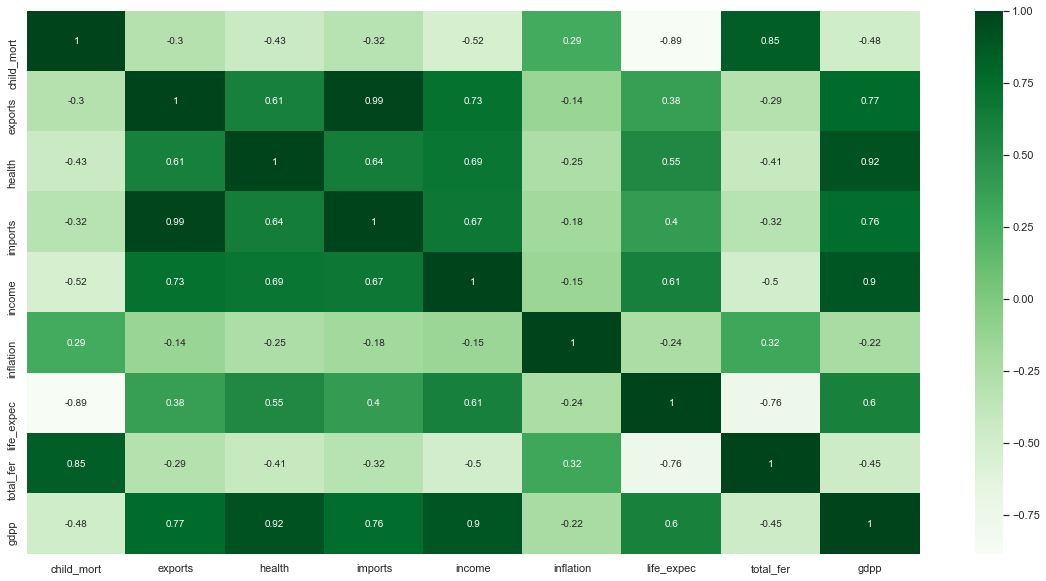

In [9]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (20,10))        
ax = sns.heatmap(country.corr(),annot = True, cmap = "Greens")

Inference:
life_expentency and child_mortality are highly correlated with correlation of -0.89

exports and income are highly correlated with correlation of 0.73
exports and imports are highly correlated with correlation of 0.99

gdpp and exports are highly correlated with correlation of 0.77
gdpp and health are highly correlated with correlation of 0.92
gdpp and imports are highly correlated with correlation of 0.76
gdpp and income are highly correlated with correlation of 0.9

total_fertility and child_mortality are highly correlated with correlation of 0.85
total_fertility and child_mortality are highly correlated with correlation of -0.76

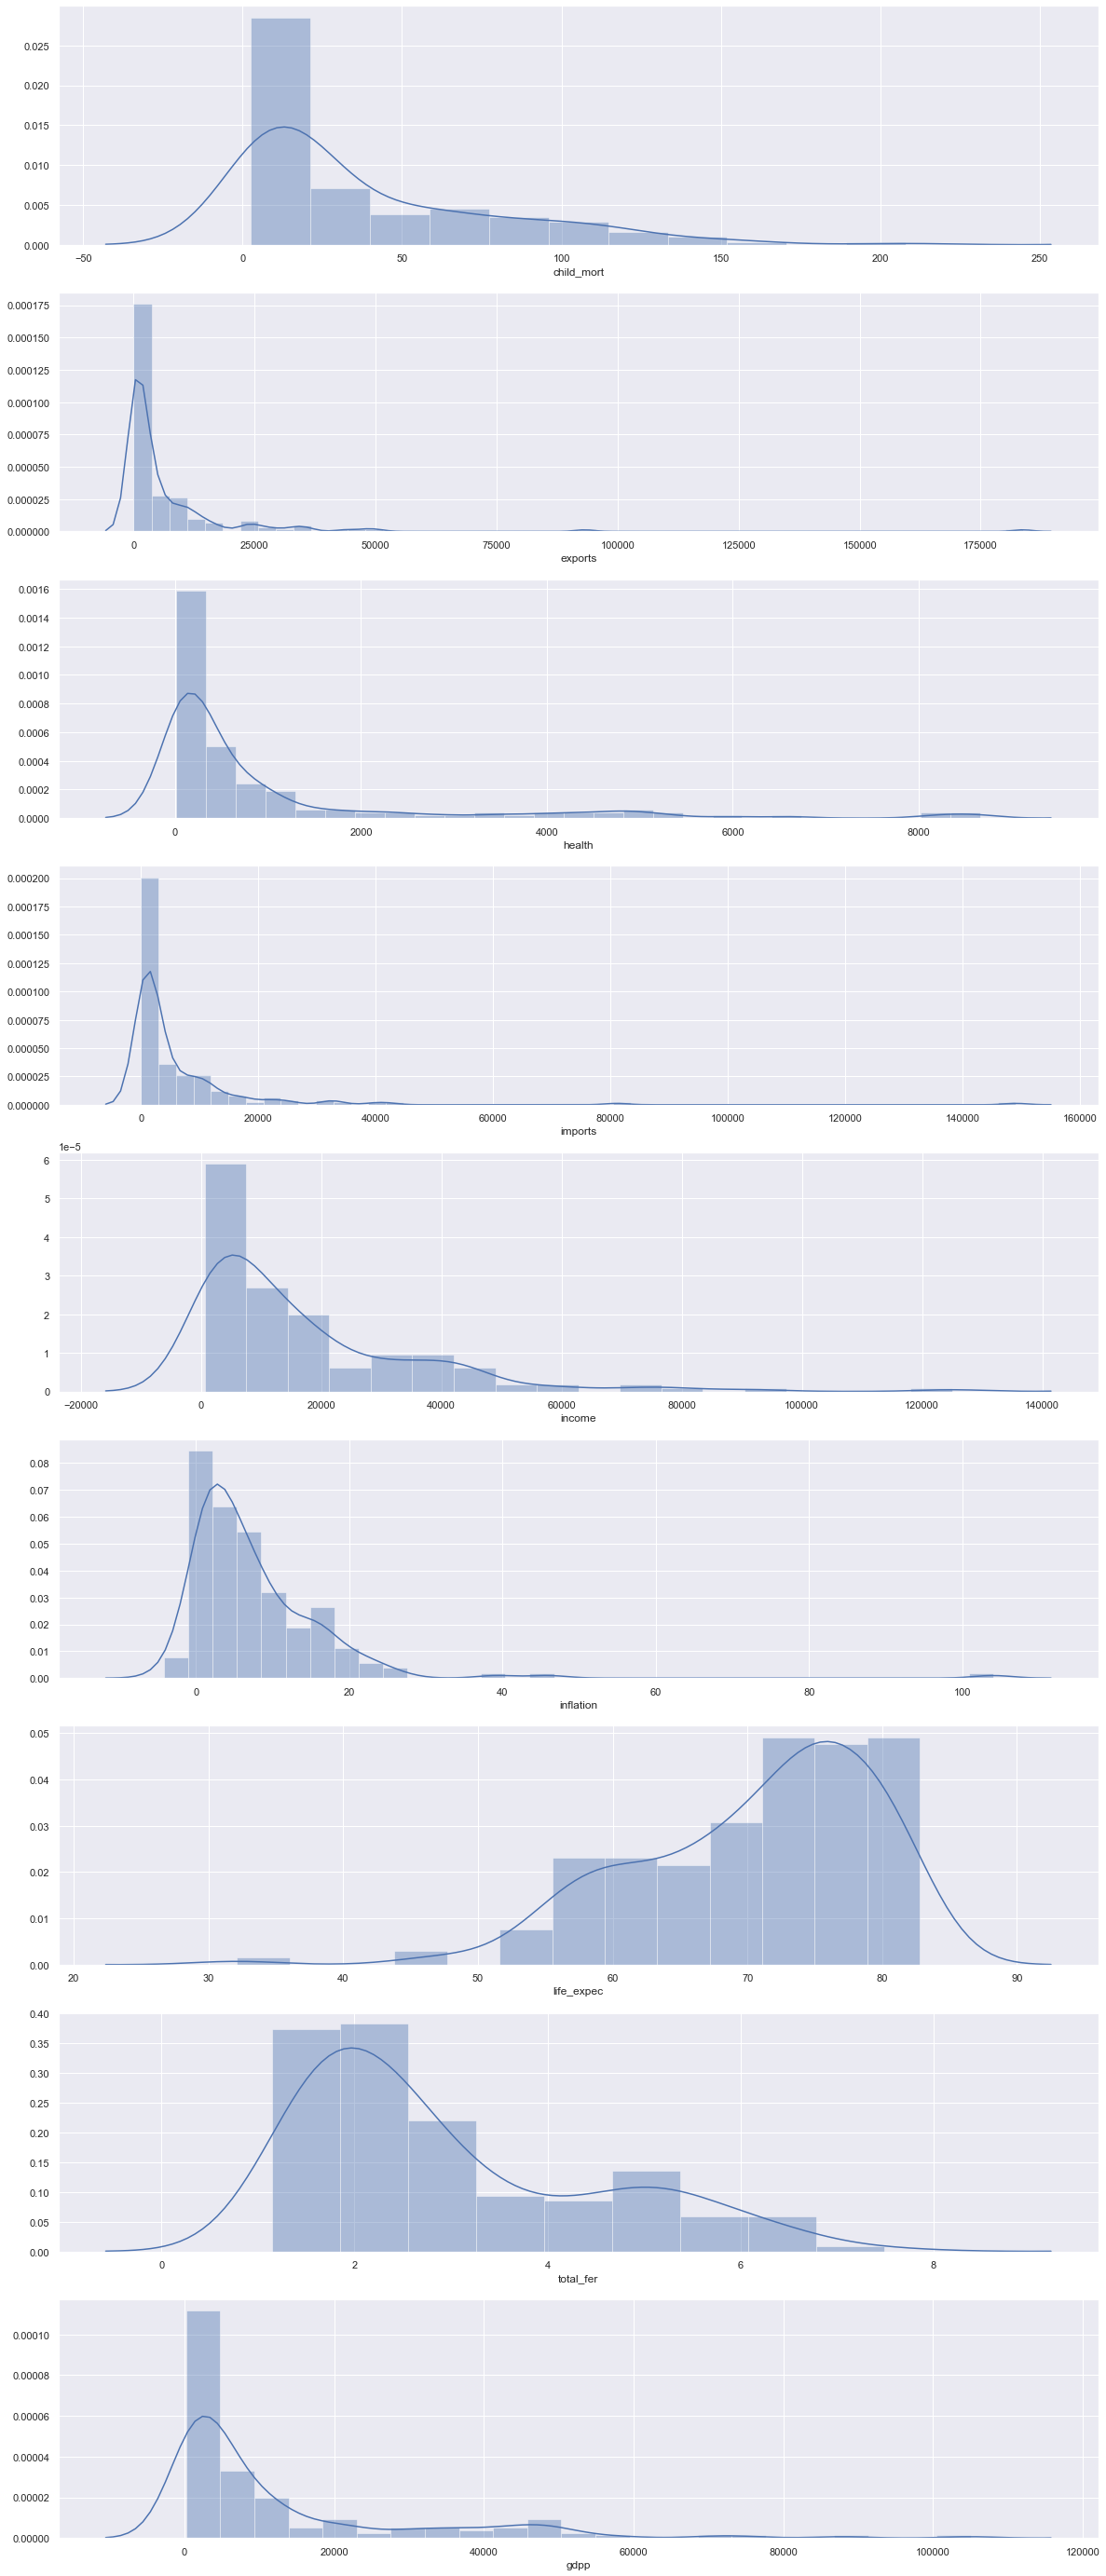

In [10]:
# Analysing data

plt.figure(figsize = (20,50))

feature = country.columns[1:]
for i in enumerate(feature):
    plt.subplot(9,1, i[0]+1)
    sns.distplot(country[i[1]])

Inferences:

All curvees can have two clusters.

One which is good interms of overall health of the company and another is bad.

We'll be focusing on bad overall health so,

Reasons can be poverty, improper sanitization, lack of health facilities for women and children and more.


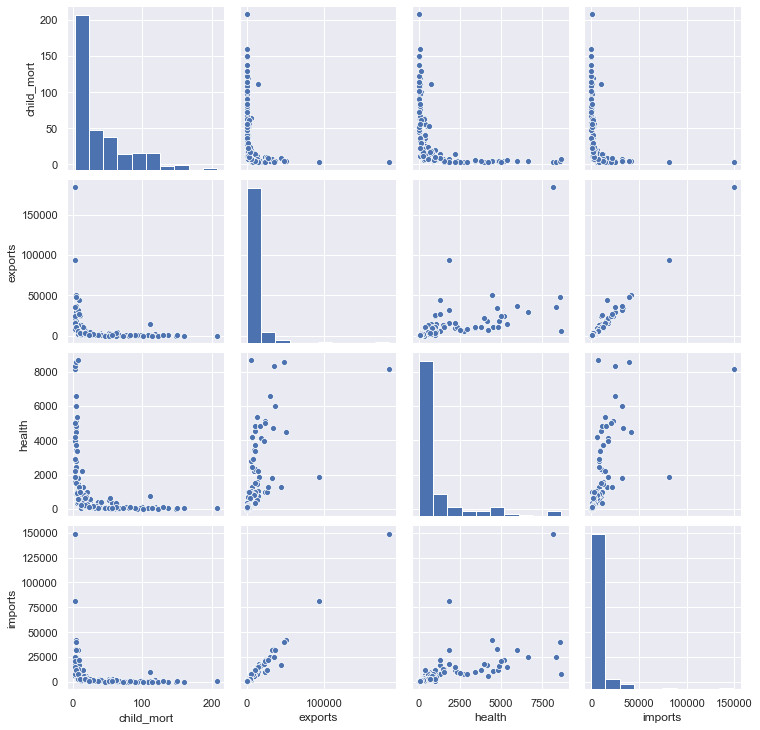

In [11]:
# Pairplot
sns.pairplot( data = country, vars = ['child_mort', 'exports', 'health', 'imports'])

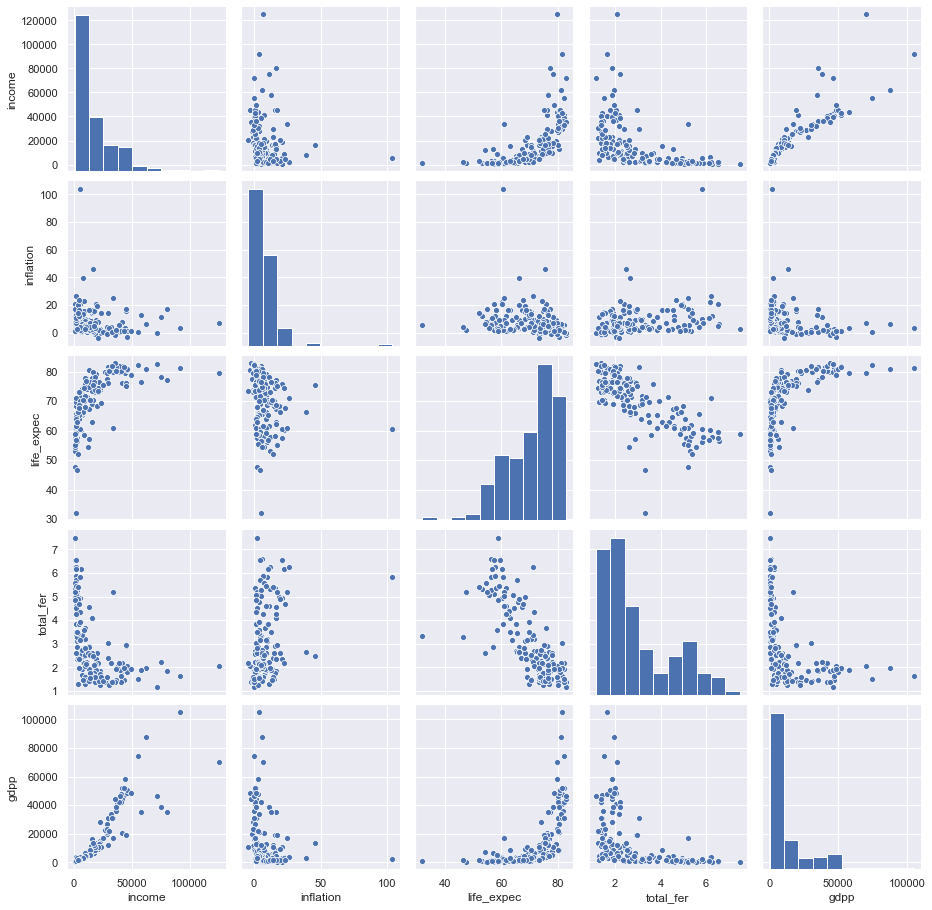

In [12]:
# Pairplot
sns.pairplot( data = country, vars = [ 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])

Mentioning few interesting observation below

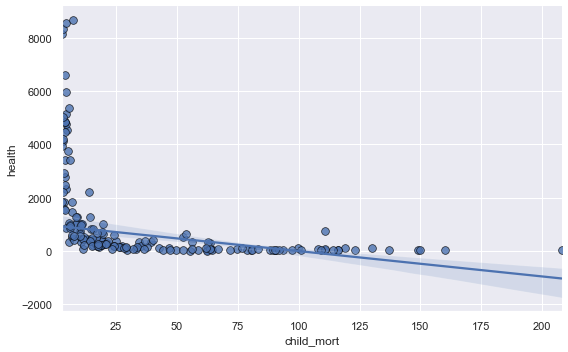

In [13]:
# Child mortality vs health
gridobj = sns.lmplot(x="child_mort", y="health", data=country, 
                     aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.show()

Inference:

A fall in child mortality rate can be observed where there is higher spending per capita on health by countries.


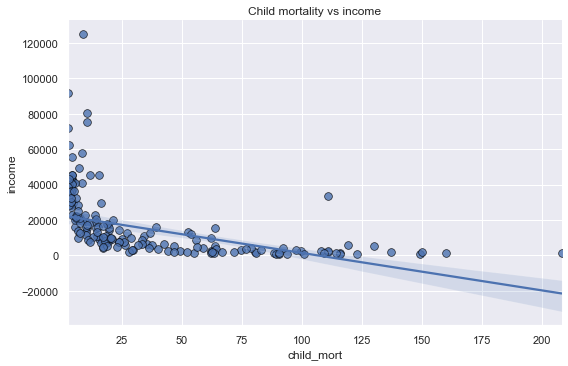

In [14]:
# Child mortality vs income
gridobj = sns.lmplot(x="child_mort", y="income", data=country, 
                     aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Child mortality vs income")
plt.show()

Inferences:

As can be inferred from the graph child mortality rate and income are inversely related, i.e., low income category have higher child mortality rate and vise versa.


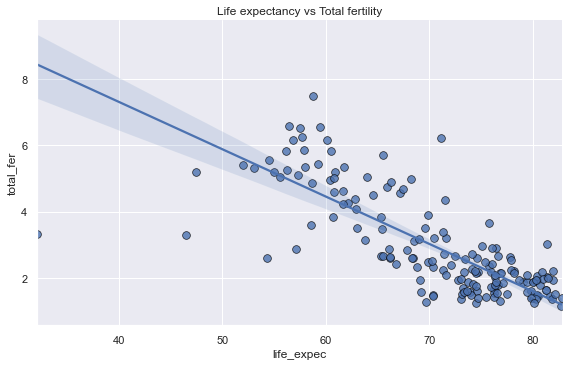

In [15]:
# Life expectancy vs Total fertility
gridobj = sns.lmplot(x="life_expec", y="total_fer", data=country, 
                     aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title("Life expectancy vs Total fertility")
plt.show()

Inferences:

Slightly rough but still highly correlated. (-0.76)

Higher the total fertility rate lesser the life expectancy and vise versa.

Again reasons can be poverty, improper sanitization, lack of health facilities for women and children and more...


## Step 4: Outliner treatment

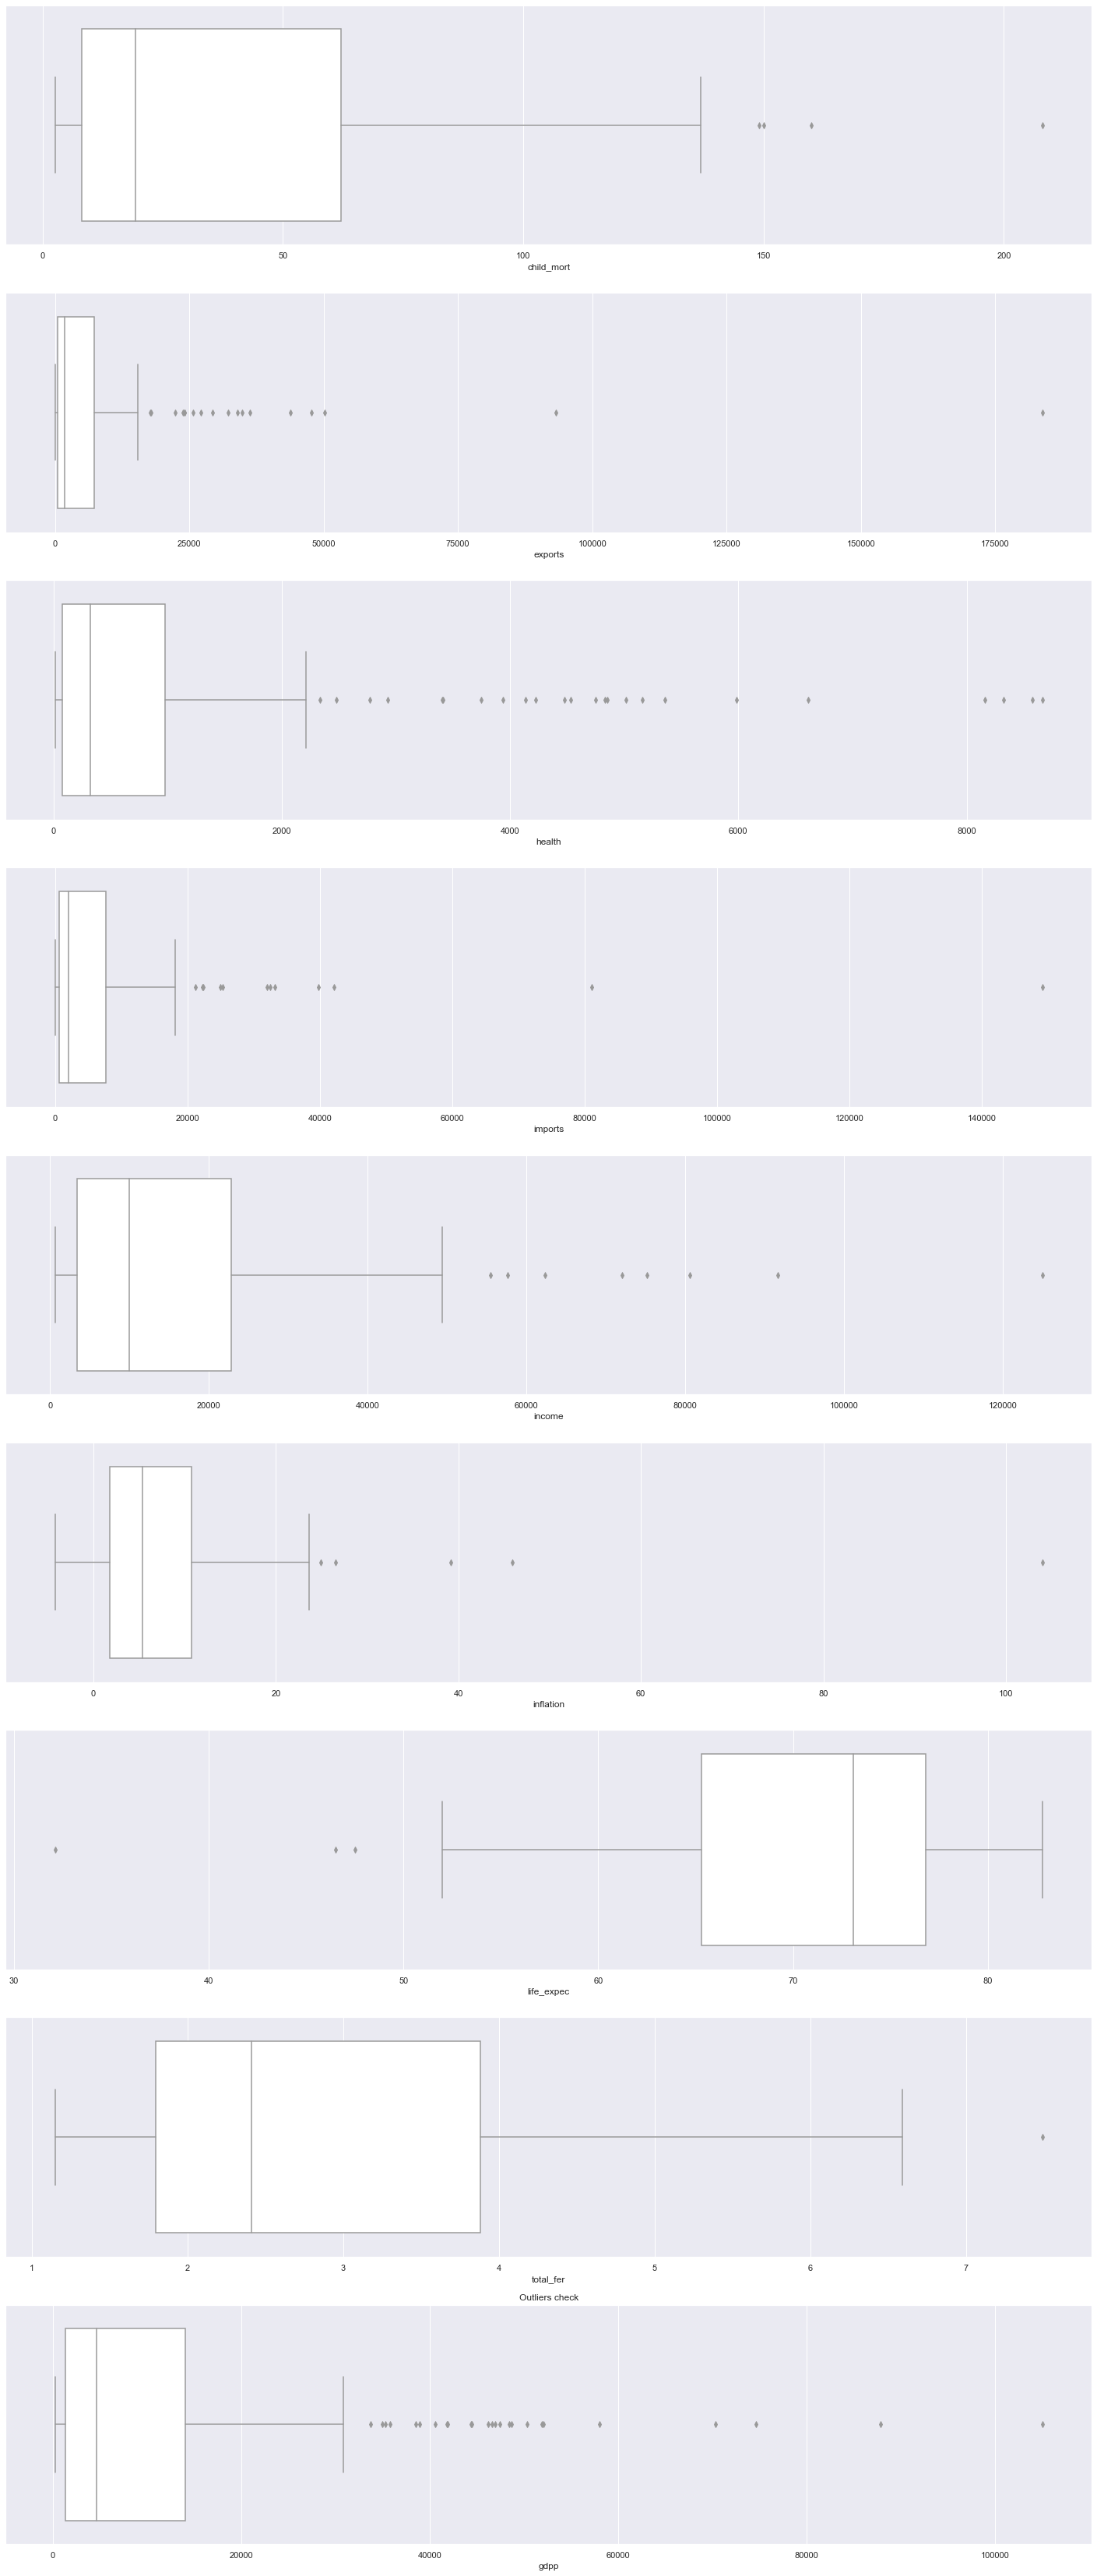

In [16]:
# Checking outliers
plt.figure(figsize = (25,60))
feature = country.columns[1:]
for i in enumerate(feature):
    plt.subplot(9,1, i[0]+1)
    sns.boxplot(country[i[1]], color = "White")
plt.title("Outliers check")
plt.show()

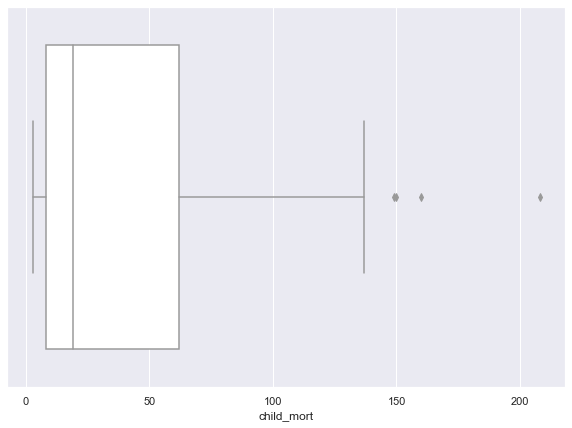

In [17]:
# Capping lower end outliers
q1 = country['child_mort'].quantile(0.01)
country['child_mort'][country['child_mort']<= q1] = q1

plt.figure(figsize = (10,7))
sns.boxplot( country['child_mort'], color = "White")
plt.show()

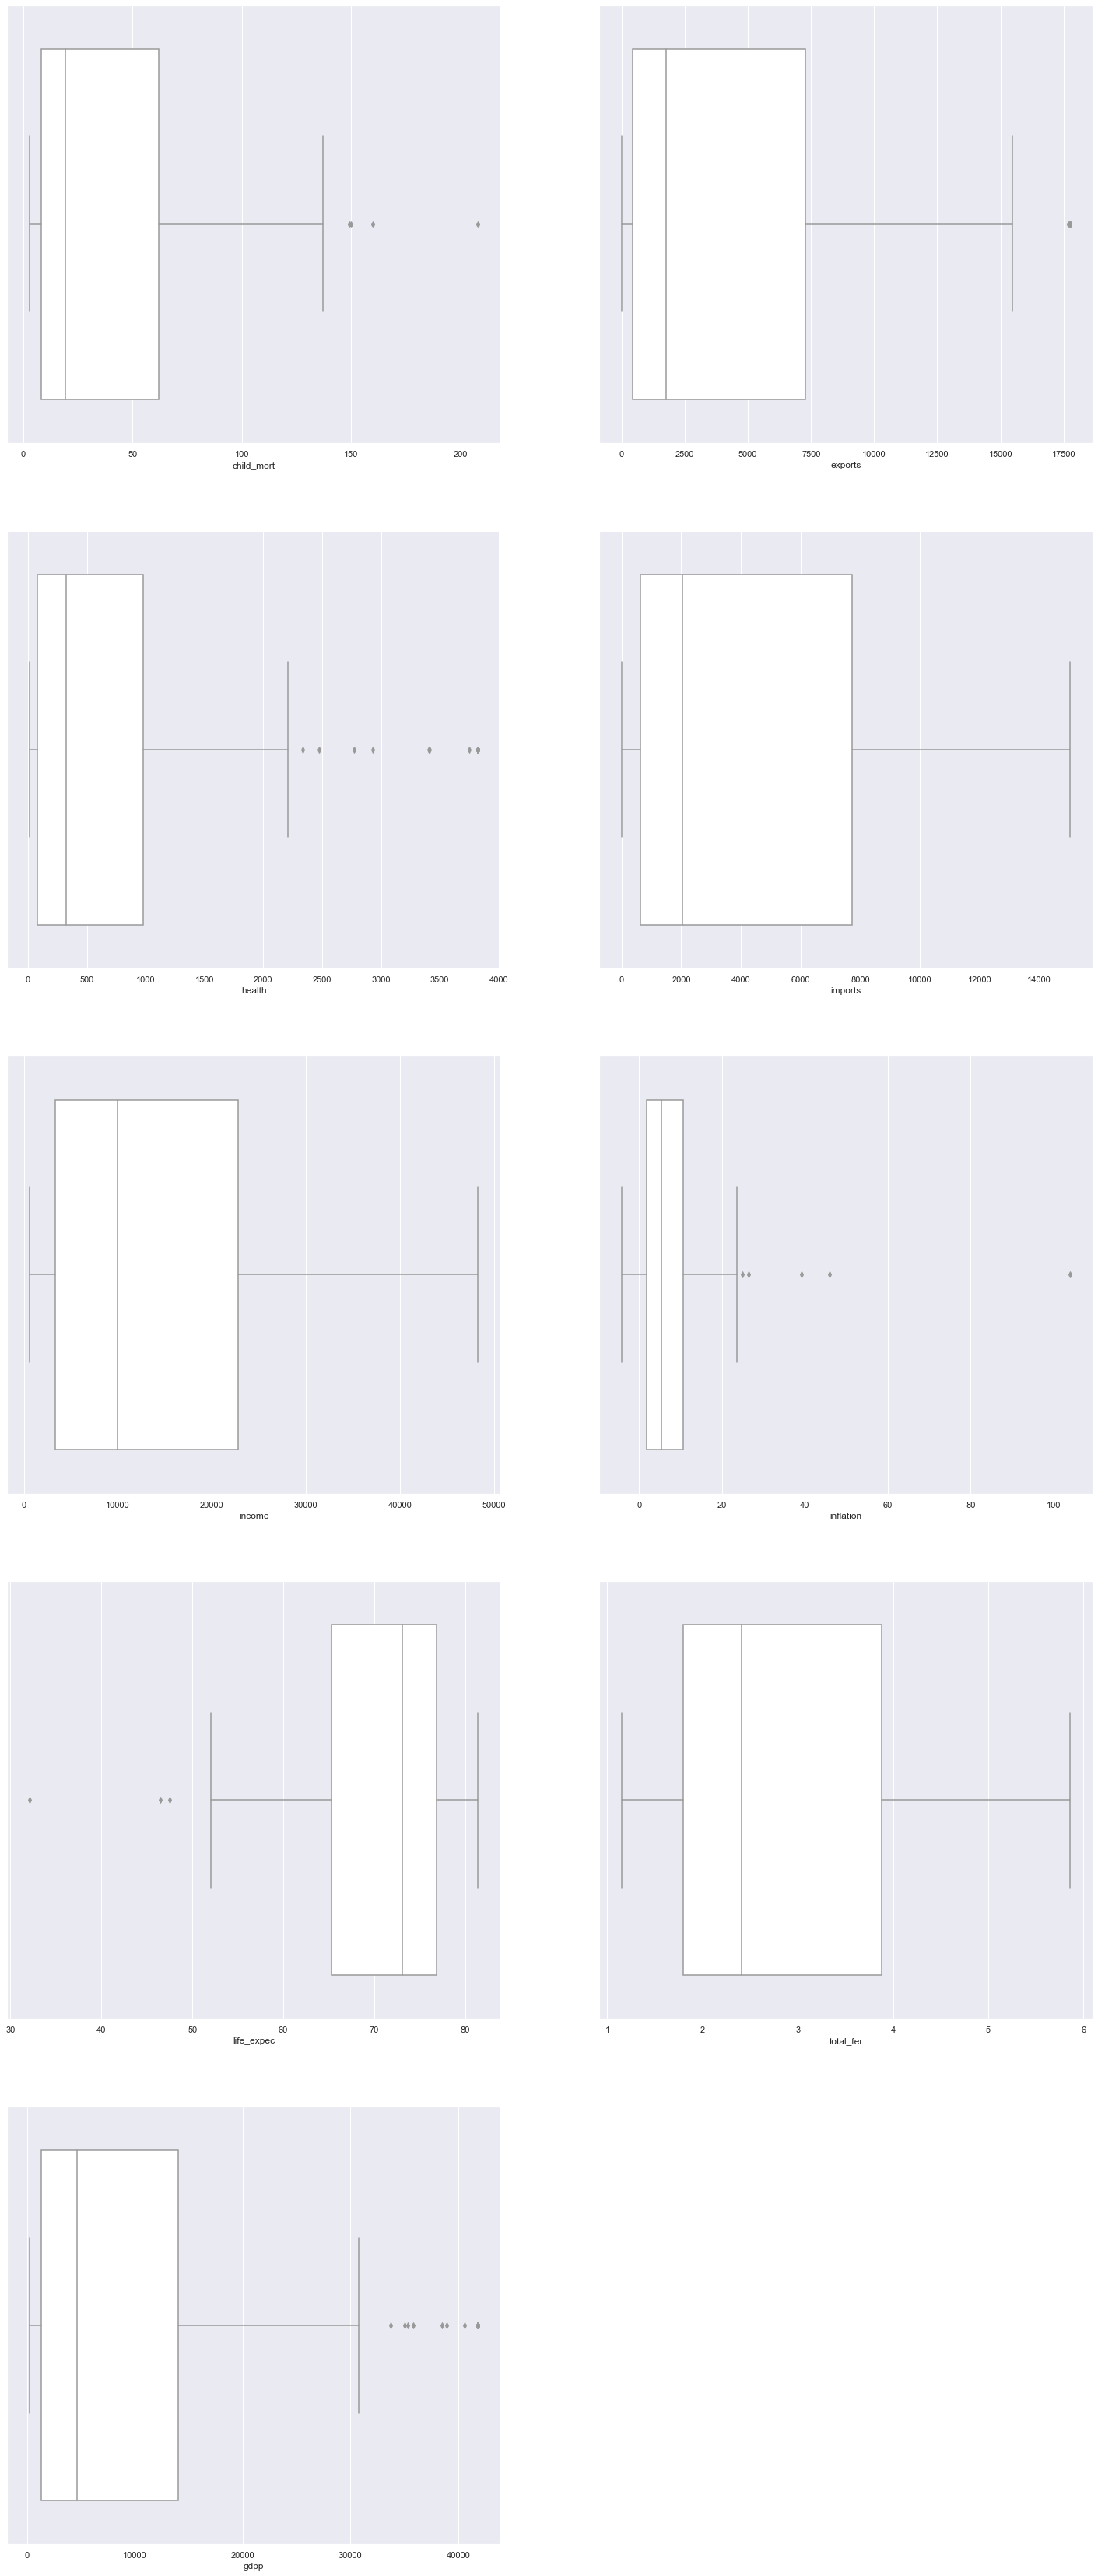

In [18]:
# Capping upper end outliers

num_col_1 = ['income',
       'life_expec', 'total_fer']

for i in num_col_1:
    q4 = country[i].quantile(0.95)
    country[i][country[i]>= q4] = q4

num_col_2 = ['imports', 'health', 'exports', 'gdpp']

for j in num_col_2:
    q4 = country[j].quantile(0.90)
    country[j][country[j]>= q4] = q4
    
plt.figure(figsize = (25,60))
feature = country.columns[1:]
for k in enumerate(feature):
    plt.subplot(5,2, k[0]+1)
    sns.boxplot(country[k[1]], color = "White")

As K-means algorithm is sensitive to outliers and 
Availability of data is limited an approach is taken to preserve the existing data by capping the outliers.

For the purpose of problem statement we are inclined towards countries which are underdeveloped or developing
That is countries with low Gdpp, low Income, High Child mortality rate, etc

In order to not temper the data of above mentioned categories of countries capping was done at the lower end of ‘Child mortality rate’ and Higher end of 'income', 'life_expectancy', 'total_fertility', 'imports', 'health', 'exports', 'gdpp'


## Step 5: Model Building

## Kmeans Clustering

In [19]:
# Dropping Country field as final dataframe will only contain data columns

country_dropped = country.copy()
country = country_dropped.pop('country')

In [20]:
# Scaling the data
scaler = StandardScaler()
country_scaled = scaler.fit_transform(country_dropped)

In [21]:
# Preparing dataframe
country_scaled_df = pd.DataFrame(country_scaled, columns = country_dropped.columns[:])
country_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.2915,-0.7973,-0.6769,-0.8415,-0.9583,0.1573,-1.6232,2.0164,-0.7868
1,-0.5390,-0.6116,-0.4904,-0.4938,-0.3940,-0.3123,0.6548,-0.8805,-0.5313
2,-0.2729,-0.5150,-0.5580,-0.6112,-0.1926,0.7893,0.6775,-0.0191,-0.5046
3,2.0078,-0.4321,-0.6285,-0.5884,-0.6674,1.3871,-1.1812,2.0449,-0.5718
4,-0.6957,0.1388,-0.1041,0.5451,0.2280,-0.6017,0.7115,-0.5471,0.0545


In [22]:
# Checking statistical data
country_scaled_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000,167.0000
mean,-0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030,1.0030
min,-0.8822,-0.8065,-0.7010,-0.8910,-1.0262,-1.1379,-4.3545,-1.2279,-0.8101
25%,-0.7467,-0.7305,-0.6467,-0.7632,-0.8400,-0.5666,-0.5918,-0.7798,-0.7307
50%,-0.4718,-0.5039,-0.4458,-0.4823,-0.3920,-0.2270,0.2922,-0.3526,-0.4901
75%,0.5927,0.4330,0.0951,0.6518,0.4790,0.2816,0.7115,0.6687,0.1882
max,4.2214,2.2186,2.4470,2.1139,2.2079,9.1297,1.2328,2.0449,2.1957


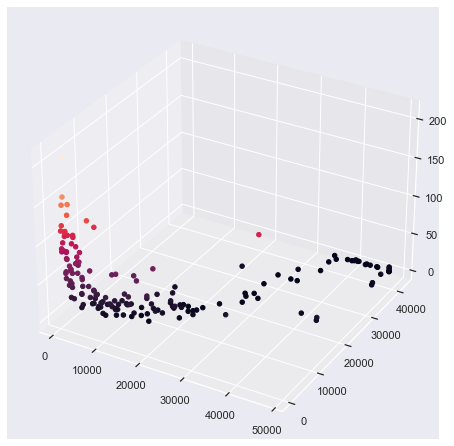

In [23]:
# 3D-Visualisation of data spread
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
sns.set(style='dark')

ax = Axes3D(fig)
g = ax.scatter(xs= country_dropped['income'],
               ys=country_dropped['gdpp'], 
               zs=country_dropped['child_mort'],c=country_dropped['child_mort'], marker='o', depthshade=False)
plt.show()



In [24]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [25]:
# Checking hopkins score multiple times for surety
for i in range(1,10):
    print(round(hopkins(country_scaled_df),2))

0.91
0.92
0.82
0.91
0.91
0.89
0.92
0.9
0.9


0.80+ is a good Hopkins score for Clustering.

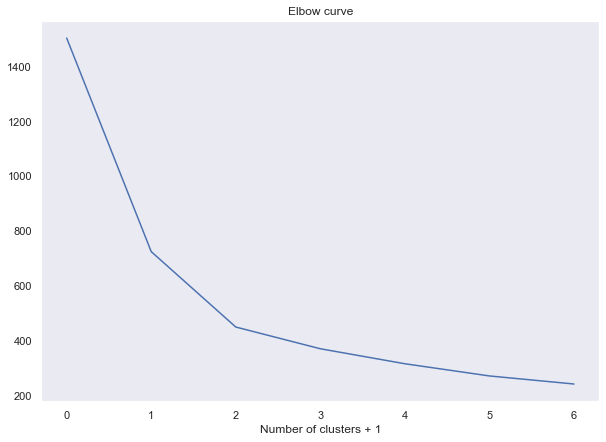

In [26]:
# Elbow curve method to find the ideal number of clusters.
plt.figure( figsize = [10,7])
ssd = []
for num_clusters in list(range(1,8)):
    cluster = KMeans(n_clusters = num_clusters, max_iter=50,random_state= 100)
    cluster.fit(country_scaled_df)
    ssd.append(cluster.inertia_)
plt.title("Elbow curve")
plt.xlabel("Number of clusters + 1")

plt.plot(ssd)
plt.show()

Elbow curve is bending at 2 as well as 3 clusters for the purpose of better differentiation we're going ahead with 3 clusters

In [27]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(country_scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.5040277893491696
For n_clusters=3, the silhouette score is 0.4526715967514395
For n_clusters=4, the silhouette score is 0.45363615757919606
For n_clusters=5, the silhouette score is 0.3439915967679912
For n_clusters=6, the silhouette score is 0.3193205095906372
For n_clusters=7, the silhouette score is 0.31989937298636023
For n_clusters=8, the silhouette score is 0.28989570318351376


silhouette score shows how good the modeling technique is on a particular number of clusters and at cluter three it is a good score

In [28]:
#K-means with k=4 clusters

cluster4 = KMeans(n_clusters=4, max_iter=50, random_state= 100)
cluster4.fit(country_scaled_df)

# Cluster labels

cluster4.labels_

# Assign the label

country_scaled_df['Cluster_Id_4'] = cluster4.labels_
country_scaled_df.head()

# Number of countries in each cluster

country_scaled_df['Cluster_Id_4'].value_counts()

# Adding cluster column in unscaled data
country_dropped["Cluster_Id_4"] = country_scaled_df['Cluster_Id_4']


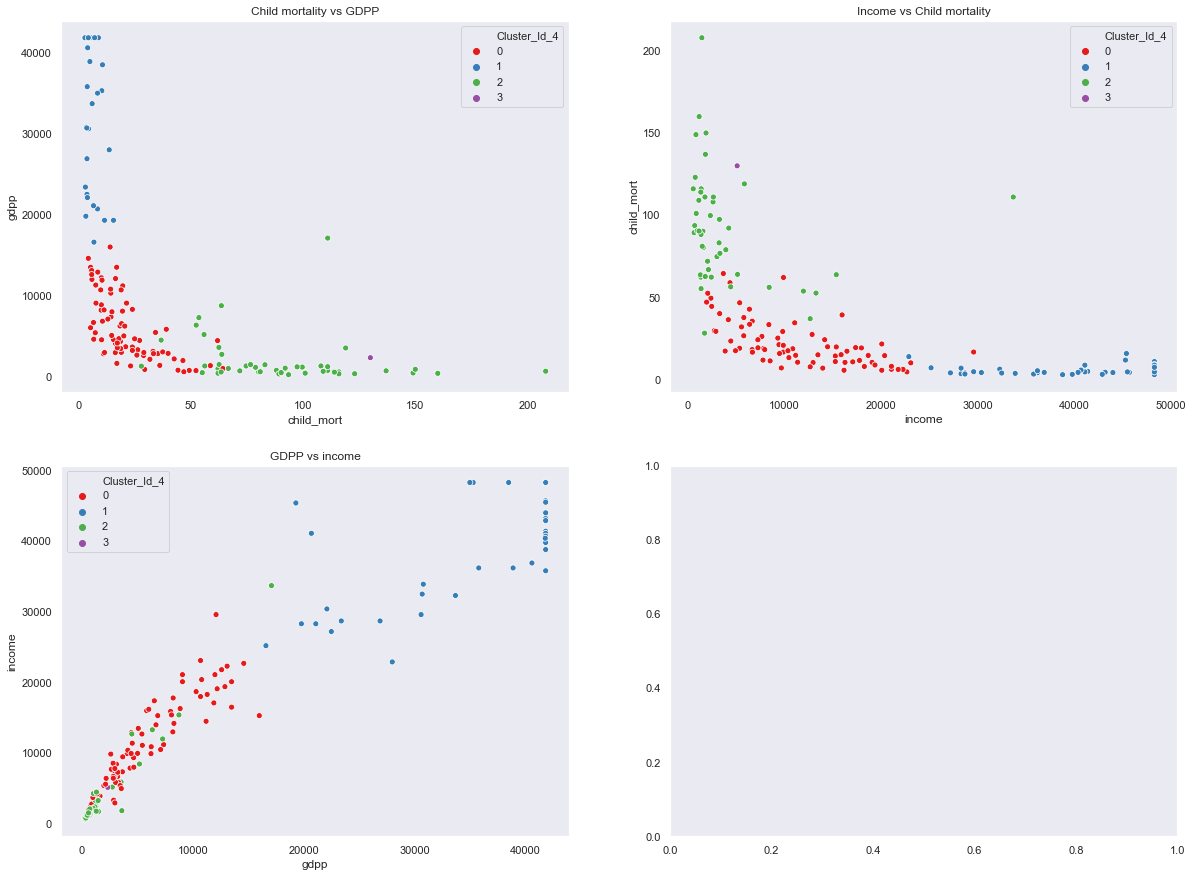

In [29]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(20,15))

p1 = sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'Cluster_Id_4', legend = 'full', palette = "Set1", data = country_dropped, ax = axes[0][0])
p2 = sns.scatterplot(x = 'income', y = 'child_mort', hue = 'Cluster_Id_4', legend = 'full', palette = "Set1", data = country_dropped,ax = axes[0][1])
p3 = sns.scatterplot(x = 'gdpp', y = 'income', hue = 'Cluster_Id_4', legend = 'full', palette = "Set1", data = country_dropped, ax = axes[1][0])

p1.set( title = "Child mortality vs GDPP")
p2.set( title = "Income vs Child mortality")
p3.set( title = "GDPP vs income")

plt.show()

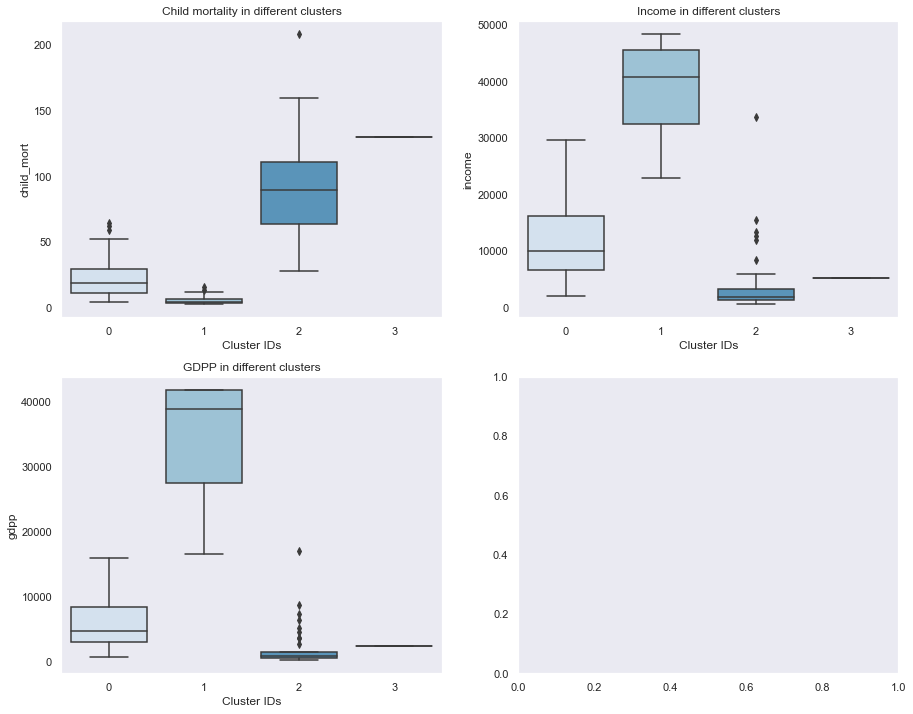

In [30]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize = (15,12))

s1 = sns.boxplot(x = 'Cluster_Id_4', y = 'child_mort', data = country_dropped, palette = "Blues", ax = axes[0][0])
s2 = sns.boxplot(x = 'Cluster_Id_4', y = 'income', data = country_dropped, palette = "Blues", ax = axes[0][1])
s3 = sns.boxplot(x = 'Cluster_Id_4', y = 'gdpp', data = country_dropped, palette = "Blues", ax = axes[1][0])

s1.set( xlabel = "Cluster IDs", title = "Child mortality in different clusters")
s2.set( xlabel = "Cluster IDs", title = "Income in different clusters")
s3.set( xlabel = "Cluster IDs", title = "GDPP in different clusters")

plt.show()


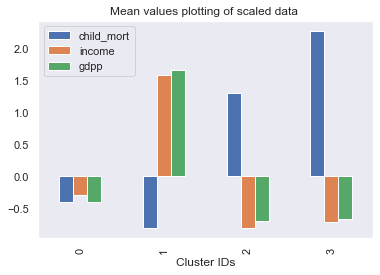

In [31]:
# Making sense out of the clusters

country_scaled_df[["child_mort", "income", "gdpp", "Cluster_Id_4"]].groupby('Cluster_Id_4').mean().plot(kind = 'bar')
plt.title( "Mean values plotting of scaled data ")
plt.xlabel("Cluster IDs")
plt.show()

In [32]:
# Value counts of clusters
country_scaled_df.Cluster_Id_4.value_counts()

0    80
2    47
1    39
3     1
Name: Cluster_Id_4, dtype: int64

 The division of countries in 4 different clusters are not balanced that is cluster 3 is offering only 1 country with same characterstics as cluster 2, hence trying with k = 3

In [33]:
country_scaled_df.drop( "Cluster_Id_4", axis = 1, inplace = True)

In [34]:
#K-means with k=3 clusters

cluster3 = KMeans(n_clusters=3, max_iter=50, random_state= 100)
cluster3.fit(country_scaled_df)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [35]:
# Cluster labels

cluster3.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [36]:
# Assign the label

country_scaled_df['Cluster_Id_3'] = cluster3.labels_
country_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id_3
0,1.2915,-0.7973,-0.6769,-0.8415,-0.9583,0.1573,-1.6232,2.0164,-0.7868,2
1,-0.5390,-0.6116,-0.4904,-0.4938,-0.3940,-0.3123,0.6548,-0.8805,-0.5313,0
2,-0.2729,-0.5150,-0.5580,-0.6112,-0.1926,0.7893,0.6775,-0.0191,-0.5046,0
3,2.0078,-0.4321,-0.6285,-0.5884,-0.6674,1.3871,-1.1812,2.0449,-0.5718,2
4,-0.6957,0.1388,-0.1041,0.5451,0.2280,-0.6017,0.7115,-0.5471,0.0545,0


In [37]:
# Number of countries in each cluster

country_scaled_df['Cluster_Id_3'].value_counts()

0    82
2    46
1    39
Name: Cluster_Id_3, dtype: int64

In [38]:
# Adding cluster column in unscaled data
country_dropped["Cluster_Id_3"] = country_scaled_df['Cluster_Id_3']

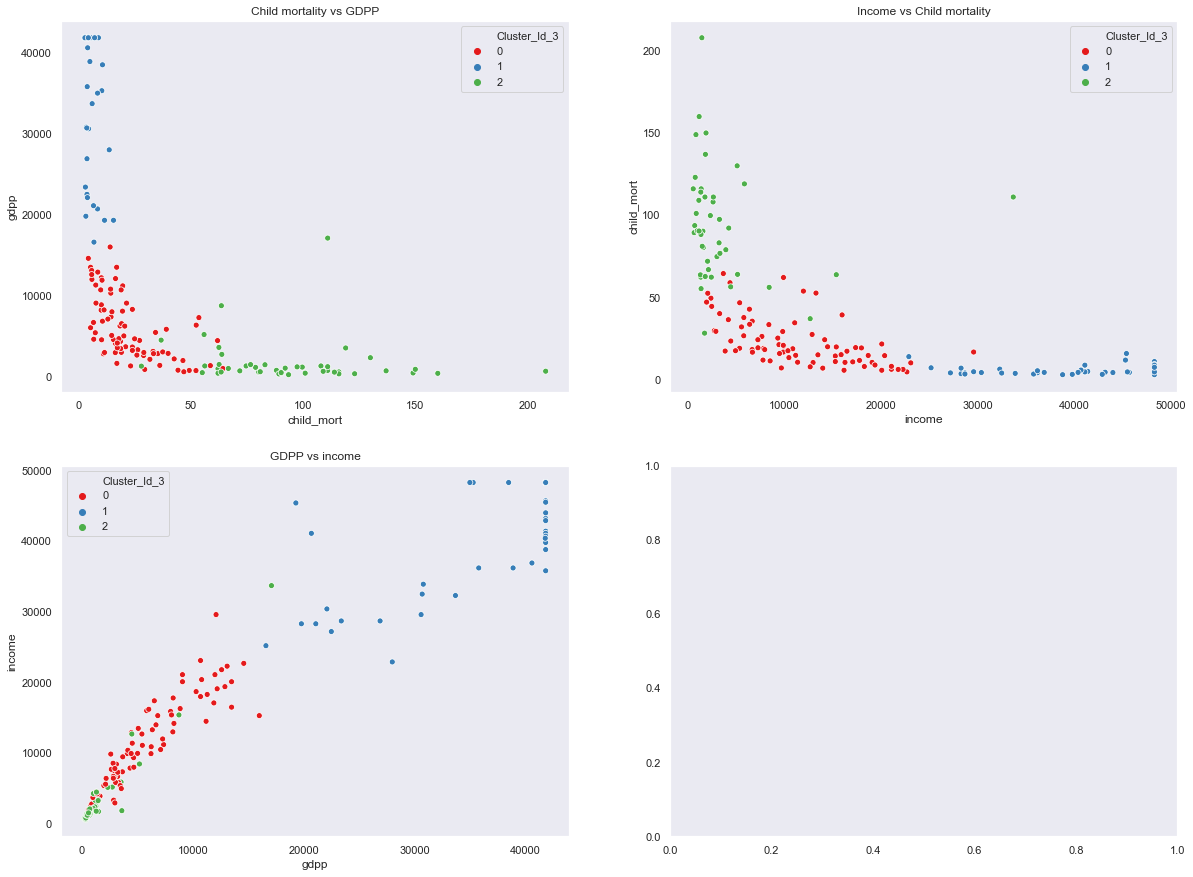

In [39]:
# Scatter plot on Principal components to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(20,15))

p1 = sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'Cluster_Id_3', legend = 'full', palette = "Set1", data = country_dropped, ax = axes[0][0])
p2 = sns.scatterplot(x = 'income', y = 'child_mort', hue = 'Cluster_Id_3', legend = 'full', palette = "Set1", data = country_dropped,ax = axes[0][1])
p3 = sns.scatterplot(x = 'gdpp', y = 'income', hue = 'Cluster_Id_3', legend = 'full', palette = "Set1", data = country_dropped, ax = axes[1][0])

p1.set( title = "Child mortality vs GDPP")
p2.set( title = "Income vs Child mortality")
p3.set( title = "GDPP vs income")

plt.show()

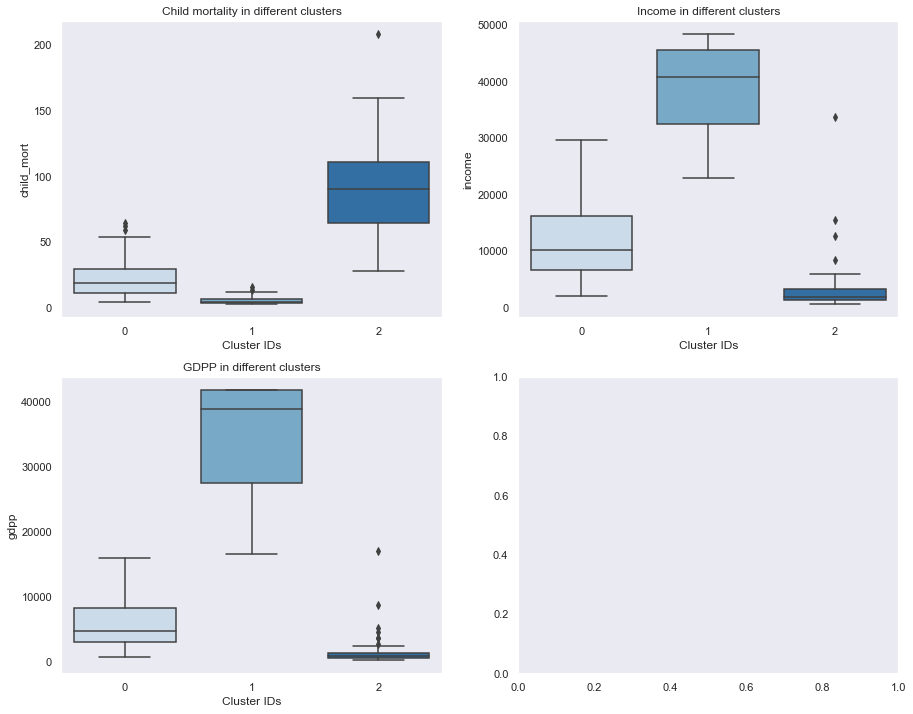

In [40]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize = (15,12))

s1 = sns.boxplot(x = 'Cluster_Id_3', y = 'child_mort', data = country_dropped, palette = "Blues", ax = axes[0][0])
s2 = sns.boxplot(x = 'Cluster_Id_3', y = 'income', data = country_dropped, palette = "Blues", ax = axes[0][1])
s3 = sns.boxplot(x = 'Cluster_Id_3', y = 'gdpp', data = country_dropped, palette = "Blues", ax = axes[1][0])

s1.set( xlabel = "Cluster IDs", title = "Child mortality in different clusters")
s2.set( xlabel = "Cluster IDs", title = "Income in different clusters")
s3.set( xlabel = "Cluster IDs", title = "GDPP in different clusters")

plt.show()

CLUSTER PROFILING
DEVELOPING COUNTRY
Cluster 0  represents average child mortality rate, average income and low Gdpp.

DEVELOPED COUNTRY
Cluster 1 represents Low Child mortality rate, High Income and High Gdpp.

UNDER DEVELOPED COUNTRY
Cluster 2 represents Above average Child mortality rate, Low income and Low Gdpp.

Proceeding with Developing and Underdeveloped countries.


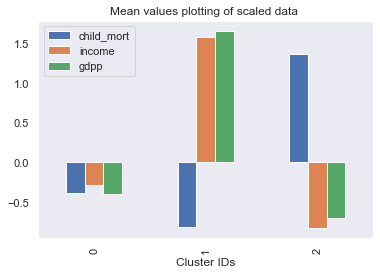

In [41]:
# Making sense out of the clusters

country_scaled_df[["child_mort", "income", "gdpp", "Cluster_Id_3"]].groupby('Cluster_Id_3').mean().plot(kind = 'bar')
plt.title( "Mean values plotting of scaled data ")
plt.xlabel("Cluster IDs")
plt.show()

Good cluster formation as every cluster has different characterstics.

In [42]:
# Adding country attribute to unscaled data
country_dropped["Country"] = country
country_scaled_df["Country"] = country

In [43]:
# List of countries in Cluster 0
clus_0_kmeans_scaled = country_scaled_df[country_scaled_df['Cluster_Id_3']==0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)
clus_0_kmeans = country_dropped[country_dropped['Cluster_Id_3']==0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

In [44]:
# List of countries in Cluster 2
clus_2_kmeans_scaled = country_scaled_df[country_scaled_df['Cluster_Id_3']==2].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)
clus_2_kmeans = country_dropped[country_dropped['Cluster_Id_3']==2].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

In [45]:
# Appending both the dataframe with need for aide for further use
df_kmean_scaled = clus_0_kmeans_scaled.append( clus_2_kmeans_scaled )
df_kmean = clus_0_kmeans.append( clus_2_kmeans )
df_kmean.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id_4,Cluster_Id_3,Country
107,64.4000,1.0769,19.4636,0.6511,3720.0000,7.0400,66.8000,2.4100,988,0,0,Myanmar
154,62.0000,3387.7200,111.0000,1975.8000,9940.0000,2.3100,67.9000,2.8300,4440,0,0,Turkmenistan
69,58.8000,305.1000,54.6750,365.8500,4410.0000,8.9800,66.2000,2.6000,1350,0,0,India
137,53.7000,2082.0800,650.8320,1994.7200,12000.0000,6.3500,54.3000,2.5900,7280,2,0,South Africa
21,52.5000,2768.6000,527.0500,3257.5500,13300.0000,8.9200,57.1000,2.8800,6350,2,0,Botswana


## Hierarchical clustering

In [46]:
# Dropping cluster id for hierarchical clustering
country_scaled_df.drop( ["Cluster_Id_3","Country"]  , axis = 1, inplace = True) 
country_dropped.drop( "Cluster_Id_3", axis = 1, inplace = True)

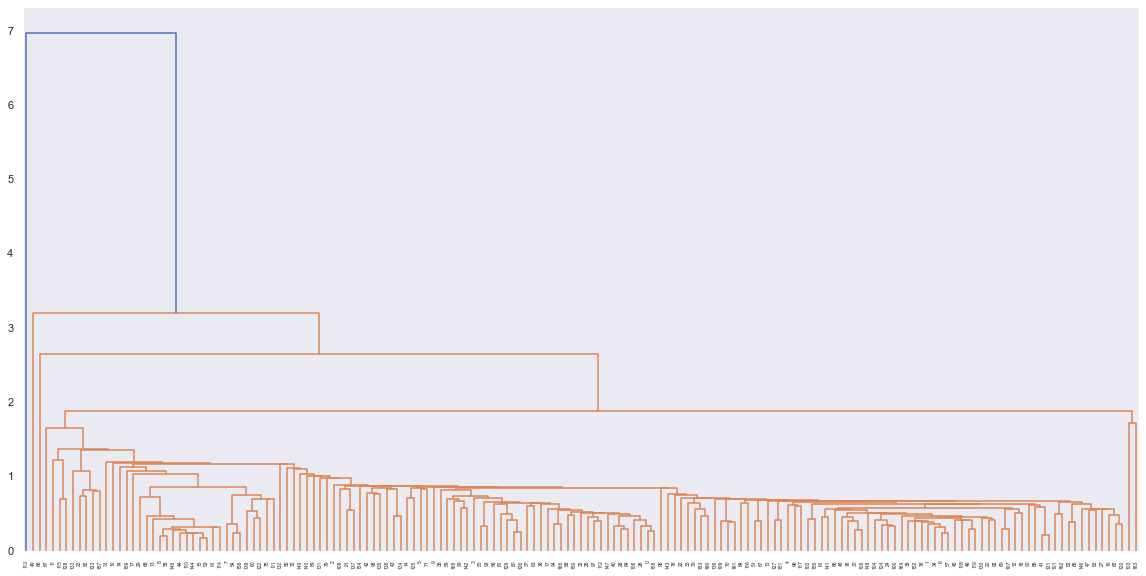

In [47]:
# Single linkage
plt.figure( figsize = [20,10])
mergings = linkage(country_scaled_df, method = 'single',metric = 'euclidean')
dendrogram(mergings)
plt.show()

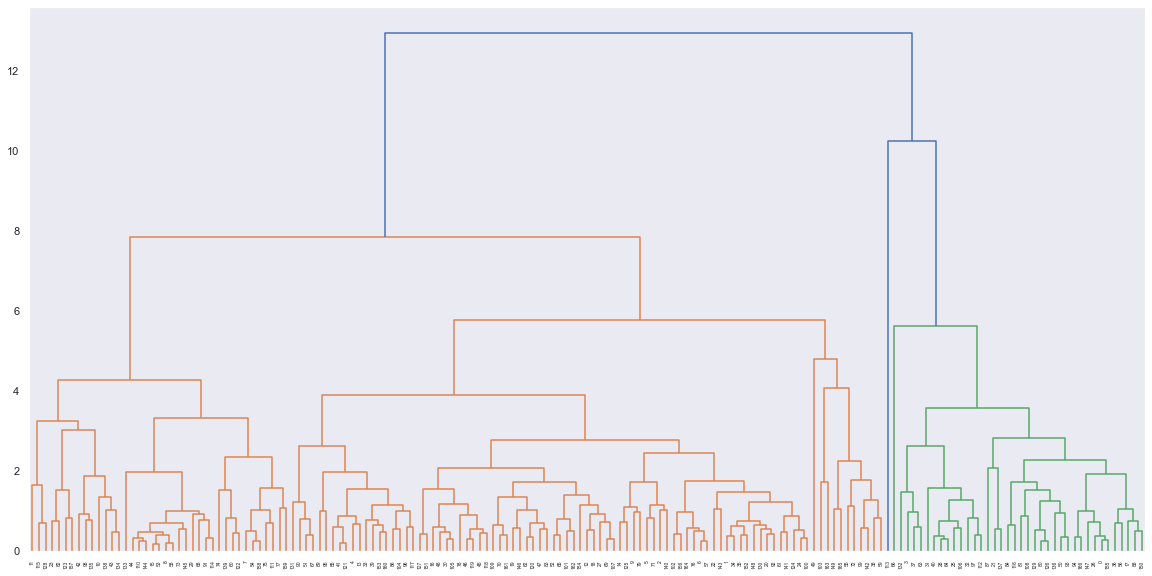

In [48]:
# Complete Linkage
plt.figure( figsize = [20,10])
mergings = linkage(country_scaled_df, method = 'complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

Number of clusters = 3 as there will be distinct properties as per the dendogram.

In [49]:
# Forming clusters and renaming columns
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
country_hc = pd.concat([country_scaled_df, clusterCut], axis=1)
country_hc.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'Cluster_Id']


In [50]:
country_hc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,1.2915,-0.7973,-0.6769,-0.8415,-0.9583,0.1573,-1.6232,2.0164,-0.7868,0
1,-0.5390,-0.6116,-0.4904,-0.4938,-0.3940,-0.3123,0.6548,-0.8805,-0.5313,1
2,-0.2729,-0.5150,-0.5580,-0.6112,-0.1926,0.7893,0.6775,-0.0191,-0.5046,1
3,2.0078,-0.4321,-0.6285,-0.5884,-0.6674,1.3871,-1.1812,2.0449,-0.5718,0
4,-0.6957,0.1388,-0.1041,0.5451,0.2280,-0.6017,0.7115,-0.5471,0.0545,1


In [51]:
# Adding new column to unscaled data of new clusters labels
country_dropped["Cluster_Id"] = country_hc['Cluster_Id']
country_dropped.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id_4,Country,Cluster_Id
0,90.2000,55.3000,41.9174,248.2970,1610.0000,9.4400,56.2000,5.8200,553,2,Afghanistan,0
1,16.6000,1145.2000,267.8950,1987.7400,9930.0000,4.4900,76.3000,1.6500,4090,0,Albania,1
2,27.3000,1712.6400,185.9820,1400.4400,12900.0000,16.1000,76.5000,2.8900,4460,0,Algeria,1
3,119.0000,2199.1900,100.6050,1514.3700,5900.0000,22.4000,60.1000,5.8610,3530,2,Angola,0
4,10.3000,5551.0000,735.6600,7185.8000,19100.0000,1.4400,76.8000,2.1300,12200,0,Antigua and Barbuda,1


In [52]:
# Number of countries in each cluster
country_dropped["Cluster_Id"].value_counts()

1    128
0     38
2      1
Name: Cluster_Id, dtype: int64

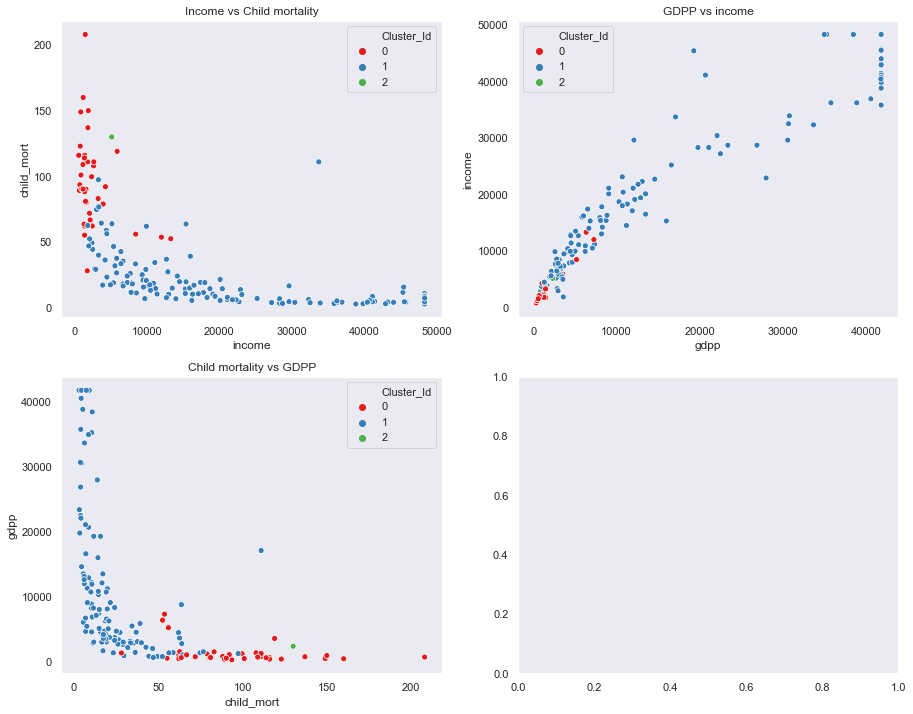

In [53]:
# Scatter plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

s1 = sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_Id',data = country_dropped,legend='full',palette="Set1",ax=axes[0][0])
s2 = sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_Id', data = country_dropped,legend='full',palette="Set1",ax=axes[0][1])
s3 = sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_Id', data=country_dropped,legend='full',palette="Set1",ax=axes[1][0])

s1.set( title = "Income vs Child mortality")
s2.set( title = "GDPP vs income")
s3.set( title = "Child mortality vs GDPP")

plt.show()

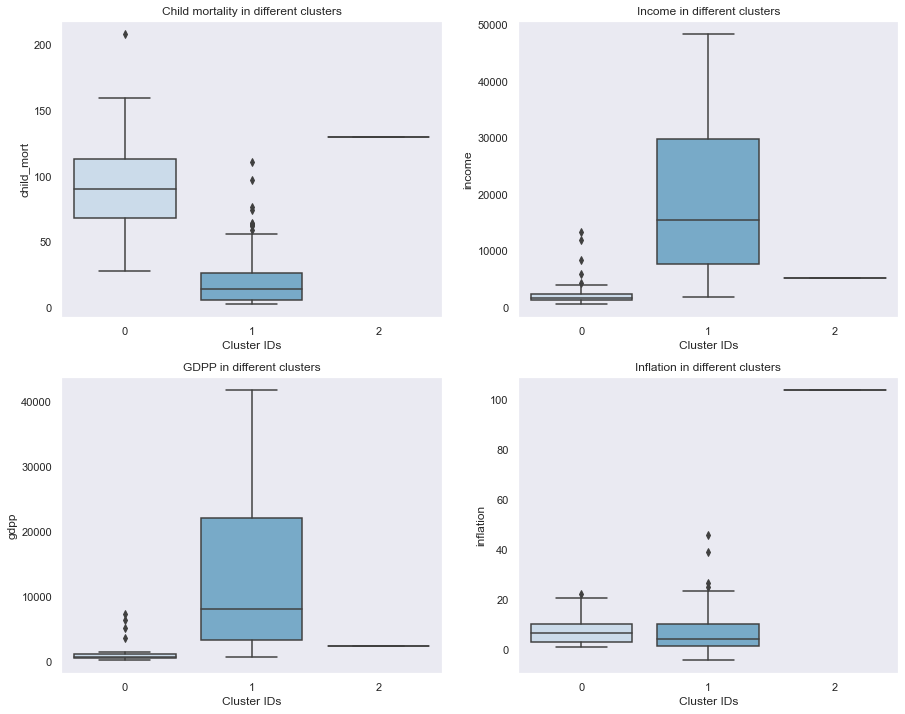

In [54]:
# Box plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

s1 = sns.boxplot(x = 'Cluster_Id', y = 'child_mort', data = country_dropped, palette = "Blues", ax=axes[0][0])
s2 = sns.boxplot(x = 'Cluster_Id', y = 'income', data = country_dropped, palette = "Blues", ax=axes[0][1])
s3 = sns.boxplot(x = 'Cluster_Id', y = 'gdpp', data=country_dropped, palette = "Blues", ax=axes[1][0])
s4 = sns.boxplot(x = 'Cluster_Id', y = 'inflation', data=country_dropped, palette = "Blues", ax=axes[1][1])

s1.set( xlabel = "Cluster IDs", title = "Child mortality in different clusters")
s2.set( xlabel = "Cluster IDs", title = "Income in different clusters")
s3.set( xlabel = "Cluster IDs", title = "GDPP in different clusters")
s4.set( xlabel = "Cluster IDs", title = "Inflation in different clusters")

plt.show()


CLUSTER PROFILING

DEVELOPING COUNTRY
Cluster 0  represents High child mortality rate, low income, low Gdpp and low inflation.

DEVELOPED COUNTRY
Cluster 1 represents Low Child mortality rate, High Income, High Gdpp and low inflation.

UNDER DEVELOPED COUNTRY
Cluster 2 represents High Child mortality rate, Low income, Low Gdpp and high inflation.

Inflation has been taken to differentiate clusters better.


In [55]:
# List of countries in Cluster 0

clus_0_hc = country_dropped[country_dropped['Cluster_Id']==0].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

In [56]:
# List of countries in Cluster 2

clus_2_hc = country_dropped[country_dropped['Cluster_Id']==2].sort_values(by = ['child_mort', 'income', 'gdpp'], ascending = [False, True, True]).head(10)

In [57]:
# Appending both the dataframe with need for aide for further use
df_hc = clus_0_hc.append( clus_2_hc )
df_hc.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id_4,Country,Cluster_Id
66,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662,2,Haiti,0
132,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399,2,Sierra Leone,0
32,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,5.8610,897,2,Chad,0
31,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446,2,Central African Republic,0
97,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,5.8610,708,2,Mali,0


In [58]:
# Sorting on the basis of 'child_mort', 'gdpp', 'income' to get top 5
df_hc.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id_4,Country,Cluster_Id
66,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662,2,Haiti,0
132,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399,2,Sierra Leone,0
32,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,5.8610,897,2,Chad,0
31,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446,2,Central African Republic,0
97,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,5.8610,708,2,Mali,0



We have analyzed both K-means and Hierarchial clustering and found clusters formed are not identical. The clusters formed in both the cases are not that great but its better in K-means as compared to Hierarchial. So, we will proceed with the clusters formed by K-means and based on the information provided by the final clusters we will deduce the final list of countries which are in need of aid.

## Step 6: Final Analysis

In [59]:
# Checking statistical data 
df_kmean.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id_4,Cluster_Id_3
count,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000,20.0000
mean,96.9600,694.9797,104.9458,665.1983,3957.5500,13.6110,60.1850,4.1293,1774.5500,1.2500,1.0000
std,49.2245,1030.0684,169.5530,848.9245,3740.8132,22.0825,9.2133,1.5068,2044.4505,1.0699,1.0260
min,44.4000,1.0769,17.7508,0.6511,609.0000,2.0100,32.1000,2.3300,334.0000,0.0000,0.0000
25%,52.4750,95.2785,29.9804,169.0660,1482.5000,5.1800,56.9500,2.7750,587.7500,0.0000,0.0000
50%,90.2000,149.3490,44.3886,378.0225,2275.0000,7.0900,59.8000,3.4200,772.0000,2.0000,1.0000
75%,131.7500,646.0575,97.0252,520.5375,5215.0000,13.1500,67.0750,5.8610,2067.5000,2.0000,2.0000
max,208.0000,3387.7200,650.8320,3257.5500,13300.0000,104.0000,71.6000,5.8610,7280.0000,3.0000,2.0000


## Filtering the data
though result from sorting algorithm is same without filtering but it is a good practice.

In [60]:
# We observed that mean child_mort is 96.9600 for the selected clusters and hence filtering lower child_mort
# than it's mean

df_kmean = df_kmean[df_kmean['child_mort']>=96.9600]
df_kmean.shape

(10, 12)

In [61]:
# We observed that mean gdpp is 1774.5500 for the selected clusters and hence filtering lower gdpp 
# than it's mean


df_kmean = df_kmean[df_kmean['gdpp']<=1774.5500]
df_kmean.shape

(8, 12)

In [62]:
# We observed that mean income is 3957.5500 for the selected clusters and hence filtering lower income 
# than it's mean

df_kmean = df_kmean[df_kmean['income']<=3957.5500]
df_kmean.shape

(8, 12)

Still 8 counties are left !

In [63]:
# Sorting on the basis of 'child_mort', 'gdpp', 'income' to get top 5
Final_list = df_kmean.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head()

In [64]:
# Reset index
Final_list.reset_index( inplace = True)

In [65]:
Final_list

,index,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id_4,Cluster_Id_3,Country
0,66,208.0000,101.2860,45.7442,428.3140,1500.0000,5.4500,32.1000,3.3300,662,2,2,Haiti
1,132,160.0000,67.0320,52.2690,137.6550,1220.0000,17.2000,55.0000,5.2000,399,2,2,Sierra Leone
2,32,150.0000,330.0960,40.6341,390.1950,1930.0000,6.3900,56.5000,5.8610,897,2,2,Chad
3,31,149.0000,52.6280,17.7508,118.1900,888.0000,2.0100,47.5000,5.2100,446,2,2,Central African Republic
4,97,137.0000,161.4240,35.2584,248.5080,1870.0000,4.3700,59.5000,5.8610,708,2,2,Mali


In [66]:
# Sorting on the basis of 'child_mort', 'gdpp', 'income' to get top 5 on scaled
df_kmean_scaled = df_kmean_scaled.sort_values(by = ['child_mort', 'gdpp', 'income'], ascending = [False, True, True]).head(5)

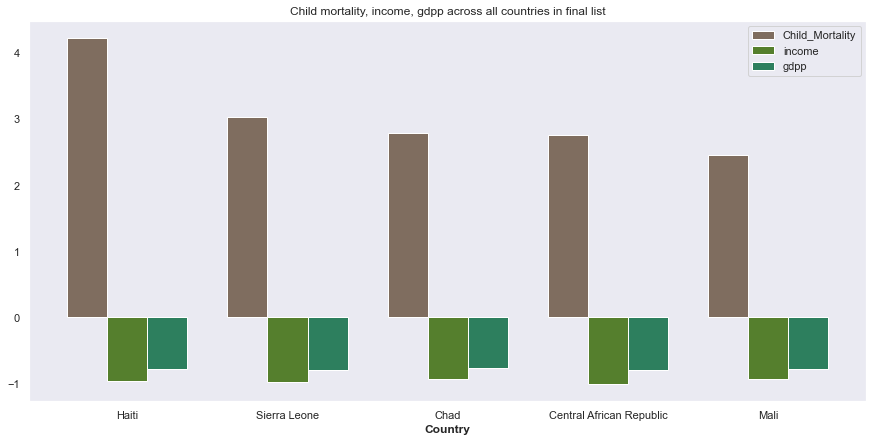

In [67]:
# Visualising final counties dataset
plt.figure( figsize = [15,7])

# set width of bar
barWidth = 0.25
 
# set height of bar
Child_Mortality = df_kmean_scaled["child_mort"]
income = df_kmean_scaled["income"]
gdpp = df_kmean_scaled["gdpp"]
 
# Set position of bar on X axis
r1 = np.arange(len(Child_Mortality))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, Child_Mortality, color='#7f6d5f', width=barWidth, edgecolor='white', label='Child_Mortality')
plt.bar(r2, income, color='#557f2d', width=barWidth, edgecolor='white', label='income')
plt.bar(r3, gdpp, color='#2d7f5e', width=barWidth, edgecolor='white', label='gdpp')
 
# Add xticks on the middle of the group bars
plt.xlabel('Country', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Child_Mortality))], df_kmean_scaled["Country"])

plt.title("Child mortality, income, gdpp across all countries in final list")
 
# Create legend & Show graphic
plt.legend()
plt.show()


## Closing Statement

We identified few factors like `child mortality`, `income`,`gdpp`, `inflation` etc which plays a vital role in deciding the development status of the country and builded clusters of countries based on that.
Based on those clusters we have identified the below list of countries which are in dire need of aid.
The list of countries are subject to change as it is based on the few factors like `Number of components chosen`,
`Number of Clusters chosen`, `Clustering method used` etc.which we have used to build the model. 

In [68]:
pd.DataFrame(Final_list.Country)

,Country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali
